# Lending Club Project
For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

### 1. Problem Definition
Predicting whether the borrower will pay in full to the investor or not

### 2. Data
[LendingClub.com](www.lendingclub.com)
loan_data.csv: 14 columns, 9578 rows

### 3. Evaluation
Random forest classifier - accuracy

### 4. Features
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the borrower has fully paid or not. 1 if not fully paid, 0 if fully paid.

# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('viridis')

In [5]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Check the FICO credit score distributions by whether or not the customer meets the credit unwriting criteria of LendingClub.com

Text(0.5, 0, 'FICO')

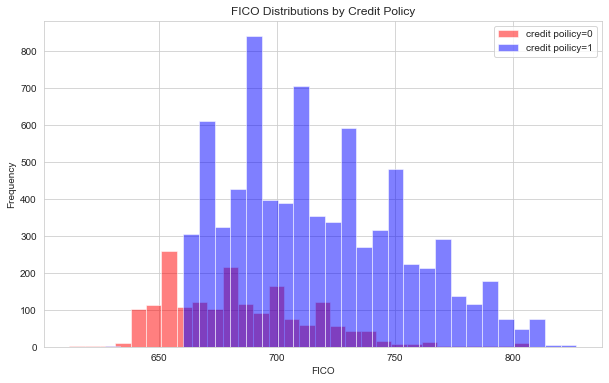

In [12]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==0]['fico'].plot.hist(bins=30, color='red', alpha=0.5, label='credit poilicy=0')
df[df['credit.policy']==1]['fico'].plot.hist(bins=30, color='blue', alpha=0.5, label='credit poilicy=1')
plt.legend()
plt.title('FICO Distributions by Credit Policy')
plt.xlabel('FICO')

Check the FICO credit score distributions by whether or not the customer has fully paid the credit

Text(0.5, 0, 'FICO')

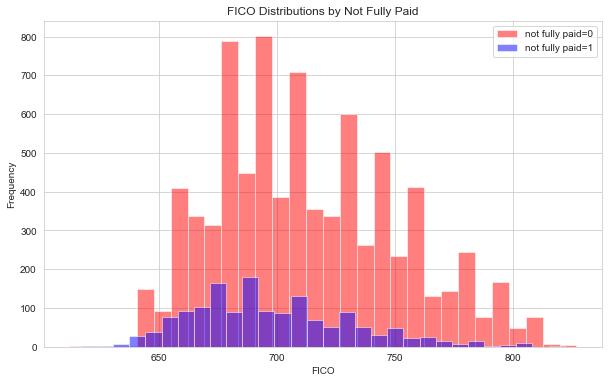

In [13]:
plt.figure(figsize=(10, 6))
df[df['not.fully.paid']==0]['fico'].plot.hist(bins=30, color='red', alpha=0.5, label='not fully paid=0')
df[df['not.fully.paid']==1]['fico'].plot.hist(bins=30, color='blue', alpha=0.5, label='not fully paid=1')
plt.legend()
plt.title('FICO Distributions by Not Fully Paid')
plt.xlabel('FICO')

How many loan credit purposes based on fully paid?

<AxesSubplot:xlabel='purpose', ylabel='count'>

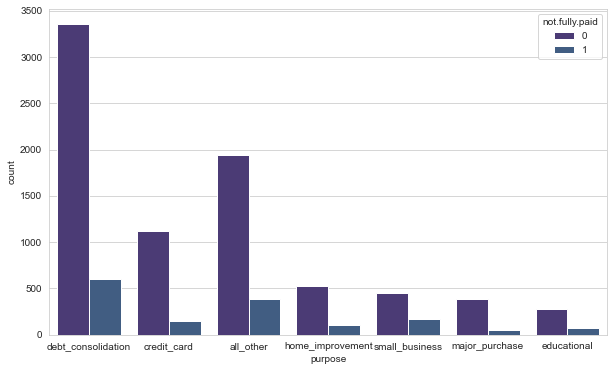

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', data=df, hue='not.fully.paid')

Check the FICO vs interest rate

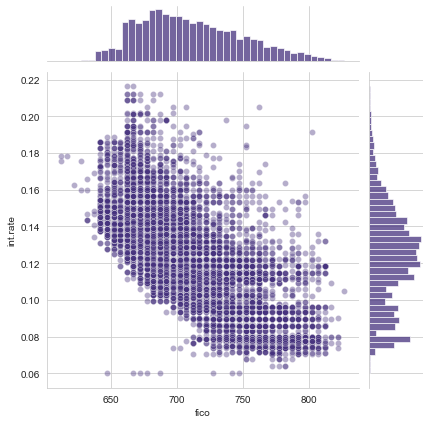

In [16]:
sns.jointplot(x='fico', y='int.rate', data=df, alpha=0.4)

D:\anaconda\envs\mlearning\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


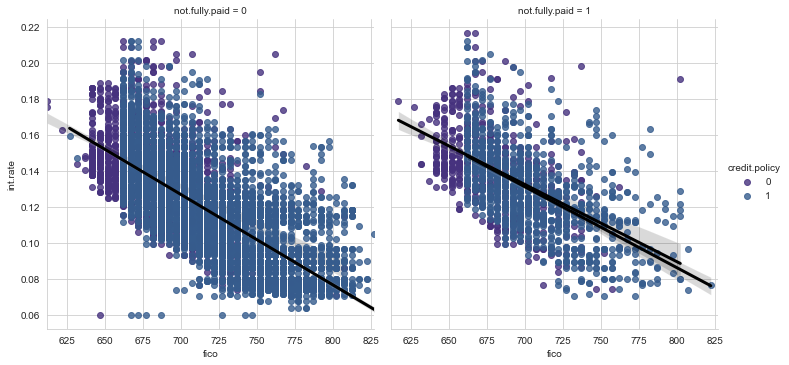

In [36]:
sns.lmplot(x='fico', y='int.rate', data=df, col='not.fully.paid', hue='credit.policy', line_kws={'lw':3, 'color':'black'})

Is there any missing value?

In [20]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

There is no missing value

# Categorical Features

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Notice that `purpose` is still in object type, we need to convert this to numeric. In order to do that, we can create dummiy variables for each purposes.

In [38]:
final_df = pd.get_dummies(df, columns=['purpose'], drop_first=True)
final_df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Now that all columns are in numeric, we can move on to the next step, which is building the model

# Build the Model

In [40]:
from sklearn.model_selection import train_test_split

X = final_df.drop('not.fully.paid', axis=1)
y = final_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train), len(X_test)

(6704, 2874)

For this project we will be using Random Forest Classifier to classify the data

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# Predictions and Evaluation

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

preds = model.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.37      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.61      0.51      0.48      2874
weighted avg       0.76      0.84      0.77      2874

[[2391   17]
 [ 456   10]]


The accuracy 84% which is not that high. Let's try to tune the hyperparameters.

# Tuning Hyperparameters

Since we're going to do grid search on large dataset, it will take a long time if we train all the data. The purpose of grid search parameters is to search for best hyperparameters combination, so it's okay to use a small dataset.

In [72]:
tune_df = final_df[0:200]
tune_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [73]:
feats_tune = tune_df.drop('not.fully.paid', axis=1)
label_tune = tune_df['not.fully.paid']
len(feats_tune)

200

In [79]:
from sklearn.model_selection import GridSearchCV

model_grid = {'n_estimators': np.arange(10, 1000, 100),
           'max_depth': [None, 5, 10],
           'min_samples_split': np.arange(2, 10, 2),
           'min_samples_leaf': np.arange(1, 10, 2)}

In [82]:
gs_model = GridSearchCV(RandomForestClassifier(),
                        param_grid=model_grid,
                        cv=3,
                        verbose=True,
                        n_jobs=-1)
gs_model.fit(feats_tune, label_tune)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  7.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])},
             verbose=True)

In [83]:
gs_model.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 510}

We use these hyperparameters and re-train our model with all the data

In [84]:
model = RandomForestClassifier(n_estimators=510, max_depth=None, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=510)

In [85]:
preds = model.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.44      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.47      2874
weighted avg       0.78      0.84      0.77      2874

[[2398   10]
 [ 458    8]]


Turns out the result is almost exactly the same as the previous un-tuned model. Let's save the model.

In [86]:
import joblib

joblib.dump(model, 'rfc-model-loan.joblib')

['rfc-model-loan.joblib']

# Test on a Brand New Data

In [87]:
test_data = df.head(1)
test_data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0


**Categorical Features**

In [94]:
final_test = pd.get_dummies(test_data, columns=['purpose'])
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               1 non-null      int64  
 1   int.rate                    1 non-null      float64
 2   installment                 1 non-null      float64
 3   log.annual.inc              1 non-null      float64
 4   dti                         1 non-null      float64
 5   fico                        1 non-null      int64  
 6   days.with.cr.line           1 non-null      float64
 7   revol.bal                   1 non-null      int64  
 8   revol.util                  1 non-null      float64
 9   inq.last.6mths              1 non-null      int64  
 10  delinq.2yrs                 1 non-null      int64  
 11  pub.rec                     1 non-null      int64  
 12  not.fully.paid              1 non-null      int64  
 13  purpose_debt_consolidation  1 non-null 

The data that was trained in the model has 19 columns because the `purpose` was one-hot encoded. We can manually add the columns and fill them with 0.

In [95]:
final_test['purpose_credit_card'] = 0
final_test['purpose_educational'] = 0
final_test['purpose_home_improvement'] = 0
final_test['purpose_major_purchase'] = 0
final_test['purpose_small_business'] = 0

In [96]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               1 non-null      int64  
 1   int.rate                    1 non-null      float64
 2   installment                 1 non-null      float64
 3   log.annual.inc              1 non-null      float64
 4   dti                         1 non-null      float64
 5   fico                        1 non-null      int64  
 6   days.with.cr.line           1 non-null      float64
 7   revol.bal                   1 non-null      int64  
 8   revol.util                  1 non-null      float64
 9   inq.last.6mths              1 non-null      int64  
 10  delinq.2yrs                 1 non-null      int64  
 11  pub.rec                     1 non-null      int64  
 12  not.fully.paid              1 non-null      int64  
 13  purpose_debt_consolidation  1 non-null 

**Drop the label column**

In [98]:
final_test.drop('not.fully.paid', axis=1, inplace=True)

**Load the model**

In [99]:
loaded_model = joblib.load('rfc-model-loan.joblib')

**Prediction**

In [100]:
predict = loaded_model.predict(final_test)

In [102]:
final_test['predicted'] = predict

In [108]:
final_test[['int.rate', 'inq.last.6mths', 'fico', 'predicted']]

,int.rate,inq.last.6mths,fico,predicted
0,0.1189,0,737,0
